**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [277]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [278]:
print(books.shape)
print(books.columns)


(271360, 8)
Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')


In [279]:
print(users.shape)
print(users.columns)

(278858, 3)
Index(['userID', 'Location', 'Age'], dtype='object')


In [280]:
print(ratings.shape)
print(ratings.columns)

(1149780, 3)
Index(['userID', 'ISBN', 'bookRating'], dtype='object')


## Exploring books dataset

In [281]:
books.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [282]:
books = books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1)

In [283]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [284]:
books['yearOfPublication'].unique() 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication


In [285]:
books.loc[books.yearOfPublication == 'DK Publishing Inc', : ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [286]:
books = books.drop(index = 209538)
books = books.drop(index = 221678)

In [287]:
books.loc[books.yearOfPublication == 'DK Publishing Inc', : ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [288]:
books.loc[books.yearOfPublication == 'Gallimard', : ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [289]:
books = books.drop(index = 220731)

In [290]:
books.loc[books.yearOfPublication == 'Gallimard', : ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [291]:
books['yearOfPublication'].unique() 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [292]:
books['yearOfPublication']=books['yearOfPublication'].astype('int64')

In [293]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

In [294]:
books['yearOfPublication'].unique() 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [295]:
books.loc[(books.yearOfPublication>2006) | (books.yearOfPublication==0),'yearOfPublication'] = np.NaN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace=True)

### Drop NaNs in `'publisher'` column


In [296]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [297]:
books.loc[(books.ISBN=='193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN=='1931696993'),'publisher'] = 'other'

In [298]:
books.shape

(271357, 5)

## Exploring Users dataset

In [299]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [300]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [301]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [302]:
users.loc[(users.Age>90)|(users.Age<5),'Age']=np.nan

### Replace null values in column `Age` with mean

In [303]:
users.Age=users.Age.fillna(users.Age.mean())

### Change the datatype of `Age` to `int`

In [304]:
users.Age=users.Age.astype(int)

In [305]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [306]:
ratings.shape

(1149780, 3)

In [307]:
n_users = users.shape[0]
n_books = books.shape[0]

In [308]:
ratings.head(10)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [309]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [310]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]
ratings_new

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [311]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [312]:
r1 = ratings_new[ratings_new.bookRating !=0] #r1 = explicit ratings

In [313]:
r2= ratings_new[ratings_new.bookRating ==0] #r2 = implicit ratings

In [314]:
users_exp_ratings = users[users.userID.isin(r1.userID)]

In [315]:
users_imp_ratings = users[users.userID.isin(r2.userID)]

In [316]:
r1

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
...,...,...,...
1149771,276704,0743211383,7
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10


### Find out which rating has been given highest number of times

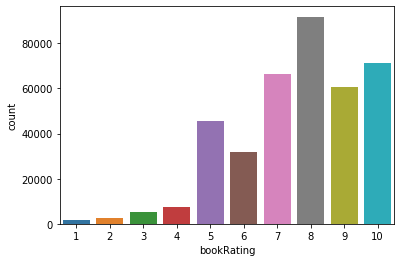

In [317]:
sns.countplot(data=r1,x='bookRating')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [318]:
counter1 = r1['userID'].value_counts()
r1=r1[r1['userID'].isin(counter1[counter1>=100].index)]
counter2 = r1['bookRating'].value_counts()
r1=r1[r1['bookRating'].isin(counter2[counter2>=100].index)]

In [319]:
r1.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [320]:
ratings_matrix = r1.pivot(index = 'userID',columns = 'ISBN',values ='bookRating').fillna(0)


In [321]:
ratings_matrix.shape

(449, 66574)

In [322]:
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
ratings_matrix.dtypes

ISBN
0000913154    float64
0001046438    float64
000104687X    float64
0001047213    float64
0001047973    float64
               ...   
B0000VZEJQ    float64
B0000X8HIE    float64
B00013AX9E    float64
B0001I1KOG    float64
B000234N3A    float64
Length: 66574, dtype: object

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [324]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds


In [325]:
U, sigma, Vt =svds(ratings_matrix, k=50)

In [326]:
print(sigma)

[147.92121923 149.34383594 150.07402888 152.20117656 152.87418704
 154.61308372 154.8009367  155.9576219  158.05647521 159.21079485
 159.81671145 162.01964856 162.77851803 163.33054935 166.02489424
 166.8162491  168.04973155 170.7748546  171.01325758 173.2942917
 174.57625311 176.65730369 178.61914388 180.29517228 182.25079073
 184.10707214 187.61690418 189.75277078 190.96974587 195.14643816
 199.83137575 201.70083342 202.18713995 203.48701648 207.26450247
 209.9298699  213.23599152 216.88280902 224.26954903 231.66187407
 235.67096044 249.95821298 252.02931103 261.24819623 267.9821169
 281.01208736 293.69539697 379.58353138 634.74439146 680.41331629]


In [327]:
sigma = np.diag(sigma)
sigma

array([[147.92121923,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34383594,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07402888, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58353138,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.74439146,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.41331629]])

In [328]:
all_users_predicted_ratings = np.dot(np.dot(U,sigma),Vt)
all_users_predicted_ratings.shape

(449, 66574)

In [329]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns,index = ratings_matrix.index)
preds_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080027,0.004746,0.028314,0.000120,-0.001693,0.067503
2110,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2276,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
4017,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4385,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673458,0.002591,-0.008229,0.001413,0.004918,0.047773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,-0.013295,-0.002811,-0.001874,-0.002811,-0.002811,-0.023810,0.250609,0.005716,0.005716,-0.028896,...,0.001848,-0.007856,0.062855,-0.001133,0.128214,-0.020683,0.007356,0.001232,-0.024207,0.100999
274301,0.017231,0.020953,0.013969,0.020953,0.020953,0.016303,0.045661,0.017187,0.017187,0.009598,...,-0.002726,0.002173,0.238855,-0.003137,0.058286,0.014197,0.010563,-0.001817,0.008224,-0.071487
275970,0.003814,-0.011141,-0.007427,-0.011141,-0.011141,0.007776,-0.012431,0.005990,0.005990,0.022312,...,0.002610,0.003690,0.015291,0.021539,-0.051916,0.008105,0.005769,0.001740,0.008526,0.126062


In [263]:
preds_df.index

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='userID', length=449)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [330]:
userID = 2110

In [331]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [333]:
sorted_user_predictions = preds_df.loc[userID].sort_values(ascending = False)
sorted_user_predictions 

ISBN
059035342X    0.682443
0345370775    0.368945
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
                ...   
0671744577   -0.056397
0399141383   -0.057334
0553569783   -0.060981
0515127833   -0.061348
0553561618   -0.067188
Name: 2110, Length: 66574, dtype: float64

In [334]:
user_data = r1[r1['userID'] == (userID )]

In [335]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [336]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [337]:
book_data = books[books['ISBN'].isin(user_data['ISBN'])]
book_data.shape

(103, 5)

In [338]:
book_data.shape

(103, 5)

In [339]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002.0,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001.0,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003.0,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983.0,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984.0,Pocket


In [340]:
user_full_info = user_data.merge(book_data, how = 'left', left_on = 'ISBN', right_on = 'ISBN').sort_values(['bookRating'],ascending = False)

In [341]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
76,2110,067166865X,10,STAR TREK YESTERDAY'S SON (Star Trek: The Orig...,A.C. Crispin,1988.0,Audioworks
52,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997.0,Apple
64,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996.0,Scholastic
63,2110,0590629778,10,"The Invasion (Animorphs, No 1)",K. A. Applegate,1996.0,Scholastic
61,2110,059046678X,10,The Yearbook,Peter Lerangis,1994.0,Scholastic


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [344]:
Top_10_recommendations = (books[~books['ISBN'].isin(user_full_info['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {userID: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:10, :-1])

In [345]:
Top_10_recommendations

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1192,0345370775,Jurassic Park,Michael Crichton,1999.0,Ballantine Books
6184,0345384911,Crystal Line,Anne McCaffrey,1993.0,Del Rey Books
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic
455,044021145X,The Firm,John Grisham,1992.0,Bantam Dell Publishing Group
2031,0451151259,Eyes of the Dragon,Stephen King,1988.0,Penguin Putnam~mass
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992.0,Eos
2435,0345353145,Sphere,MICHAEL CRICHTON,1988.0,Ballantine Books
6048,0451167317,The Dark Half,Stephen King,1994.0,Signet Book
